In [ ]:
# We will work with "Parkinsons Telemonitoring" dataset of the University of Oxford. 
# The original study used a range of linear regression methods to predict the clinician's Parkinson's disease symptom score on the UPDRS scale
# We load the dataset "Parkinsons Telemonitoring" using the numpy loadtxt function.
# The columns are separated by ',' delimiter, which we pass to the loadtxt function.

In [3]:
import numpy as np
data = np.loadtxt("data.txt")

We want to work now with 2-dim data, in order to plot it in 3d space. Therefore we select 2 columns (attributes) from total of 12 columns.  

In this example we will select attributes "Clinician's motor UPDRS score" and "Clinician's total UPDRS score", which are 4th and 5th columns. 

In [4]:
X = data[:, :-1]
y = data[:, -1]
print X[:10, :]
print y[:10]

[[ 0.89025535  0.00719353]
 [ 0.51876972  0.66267709]
 [ 0.6324428   0.41503164]
 [ 0.53400723  0.72971029]
 [ 0.07562908  0.34849833]
 [ 0.64590294  0.17882449]
 [ 0.13889428  0.77576118]
 [ 0.53768079  0.68677581]
 [ 0.79351168  0.41534152]
 [ 0.12534066  0.62403129]]
[ 4.72286194  2.11769119  2.70299732  2.84876385  0.51465838  2.48389301
  0.88908595  2.78417807  4.28596443  0.7336056 ]


In [5]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=1)
print X.shape
print y.shape

(500L, 2L)
(500L,)


In [6]:
train_set_size = X.shape[0] / 2
print train_set_size
X_train = X[:train_set_size, :]  # selects first train_set_size rows (examples) for train set
X_test = X[train_set_size:, :]   # selects from row train_set_size until the last one for test set
print(X_train.shape)
print(X_test.shape)

250
(250L, 2L)
(250L, 2L)


In [7]:
y_train = y[:train_set_size]   # selects first 15 rows (targets) for train set
y_test = y[train_set_size:]    # selects from row 250 until the last one for test set
print(y_train.shape)
print(y_test.shape)

(250L,)
(250L,)


In [10]:
%matplotlib inline

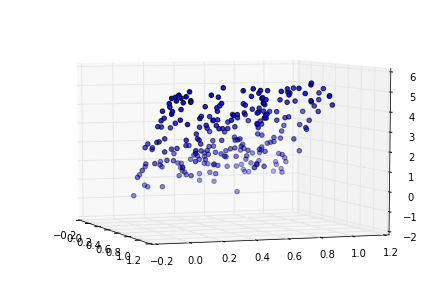

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(X_train[:500, 0], X_train[:500, 1], y_train[:500])
ax.view_init(6,-20)
plt.show()

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()


Fit the model using the training set

In [13]:
regr.fit(X_train, y_train);

We found the coefficients and the bias (the intercept)

In [14]:
print(regr.coef_)
print(regr.intercept_)

[ 5.09290954  0.36738446]
-0.155928696166


Now we calculate the mean square error on the test set

In [15]:
# The mean square error
print("Training error: ", np.mean((regr.predict(X_train) - y_train) ** 2))
print("Test     error: ", np.mean((regr.predict(X_test) - y_test) ** 2))

('Training error: ', 0.16378190472570775)
('Test     error: ', 0.17896195408765664)


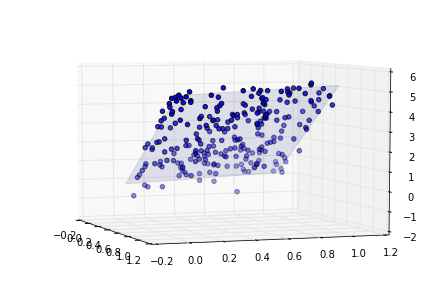

In [18]:
#Plotting data and linear model

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)


ax.scatter3D(X_train[:500, 0], X_train[:500, 1], y_train[:500])    # plots 3d points, 500 is number of points which are visualized

# here we create plane which we want to plot, using the train data and predictions (you don't need to understand it)
range_x = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), num=10)
range_y = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), num=10)
xx, yy = np.meshgrid(range_x, range_y)
zz = np.vstack([xx.ravel(), yy.ravel()]).T
pred = regr.predict(zz)
pred = pred.reshape(10, 10)

ax.plot_surface(xx, yy, pred, alpha=.1)  # plots the plane
ax.view_init(6,-20)
plt.show()


Now we plot the data and the plane in similar way for test data:

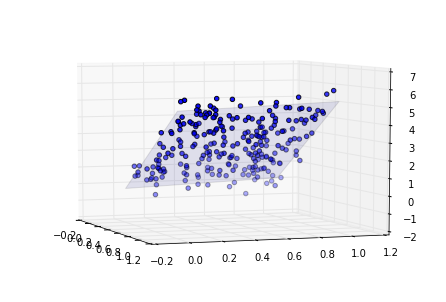

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(X_test[:500, 0], X_test[:500, 1], y_test[:500])    # plots 3d points 500 is number of points which are visualized

# here we create plane which we want to plot, using the train data and predictions (you don't need to understand it)
range_x = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), num=10)
range_y = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), num=10)
xx, yy = np.meshgrid(range_x, range_y)
zz = np.vstack([xx.ravel(), yy.ravel()]).T
pred = regr.predict(zz)
pred = pred.reshape(10, 10)

ax.plot_surface(xx, yy, pred, alpha=.1)  # plots the plane
ax.view_init(6,-20)
plt.show()
